<a href="https://www.kaggle.com/code/sandip2233/heart-disease?scriptVersionId=120089087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [252]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [254]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [255]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [258]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [259]:
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0           1  
1                 1          4        7.0       0              0           0  
2                 1          1        8.0       1              0           0  
3                 0          2        6.0       0              0           1  
4                 1          4        8.0       0              0           0

In [260]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[['BMI','PhysicalHealth', 'MentalHealth', 'AgeCategory','Race',  'GenHealth', 'SleepTime']]=scaler.fit_transform(df[['BMI', 'PhysicalHealth', 'MentalHealth',  'AgeCategory','Race', 'GenHealth', 'SleepTime',]])

In [261]:
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    0            7     5         2   
1                0.0            0    0           12     5         0   
2               30.0            0    1            9     5         2   
3                0.0            0    0           11     5         0   
4                0.0            1    0            4     5         0   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1    1            8     3         2   
319791           0.0            0    1            3     3         0   
319792           0.0            0    0            5     3         0   
319793           0.0            0    0            1     3         0   
319794           0.0            0    0           12     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4        5.0       1              0   
1                      1          4        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          4        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1        6.0       1              0   
319791                 1          4        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

In [262]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [263]:
np.any(np.isnan(df))

False

In [264]:
np.all(np.isfinite(df))

True

In [265]:
df.isnull().sum()

index               0
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:title={'center':'Count of HeartDisease'}, xlabel='HeartDisease', ylabel='count'>

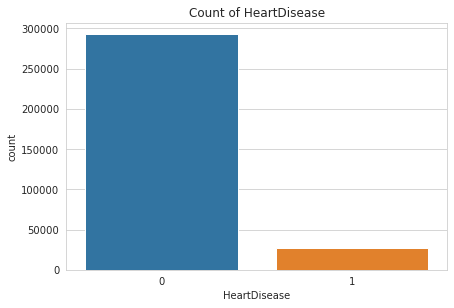

In [266]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title ('Count of HeartDisease')
sns.countplot(x = 'HeartDisease', data = df)

In [267]:
import numpy as np    
arr=np.array(df.HeartDisease)

In [291]:
X1, y1 = make_classification(n_samples=319795, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

In [269]:
counter=Counter(arr)
counter

Counter({0: 292422, 1: 27373})

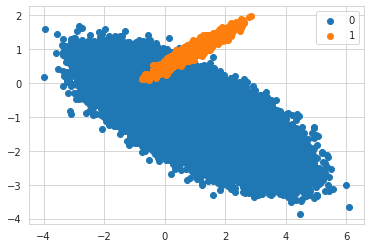

In [270]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))

plt.legend()
plt.show()

In [271]:
X = df.drop(['HeartDisease'], 1)
y = df.HeartDisease

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**SPLIT THE DATASET**

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [274]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# **KNN**

In [275]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 91.04
Time consumed for training: 0.028 seconds
Time consumed for prediction: 463.49144 seconds


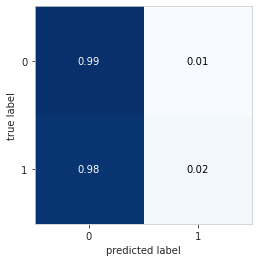

In [276]:
conf_mat = confusion_matrix(y_test, knn.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **GAUSSIAN-NB**

In [277]:
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 88.06
Time consumed for training: 0.109 seconds
Time consumed for prediction: 0.03217 seconds


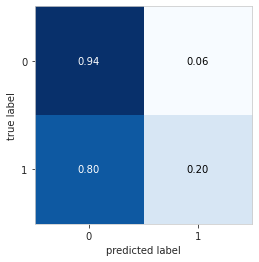

In [278]:
conf_mat = confusion_matrix(y_test, gnb.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **XG-Boost**

In [279]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 91.59
Time consumed for training: 14.713
Time consumed for prediction: 0.11625 seconds


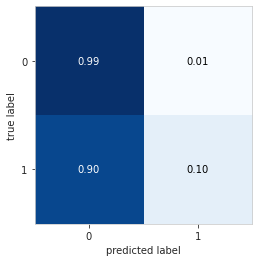

In [280]:
conf_mat = confusion_matrix(y_test, xgb.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **RANDOM FOREST**

In [281]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 91.10
Time consumed for training: 4.624 seconds
Time consumed for prediction: 0.34312 seconds


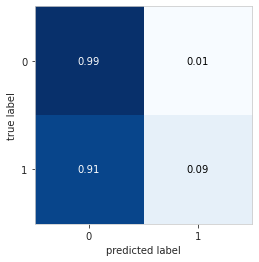

In [282]:
conf_mat = confusion_matrix(y_test, rfc.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **COMPARE ALL MODEL**

In [283]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc]})
   
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

Score
Model                   
XGBoost        91.591854
Random Forest  91.103106
KNN            91.044944
Naive Bayes    88.061802

In [284]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


# **USING SMOTE**

In [285]:
from imblearn.over_sampling import SMOTE

sm  = SMOTE(random_state = 33)

In [287]:
X_sm, y_sm = sm.fit_resample(X, y)

In [288]:
counter=Counter(y_sm)
counter

Counter({0: 292422, 1: 292422})

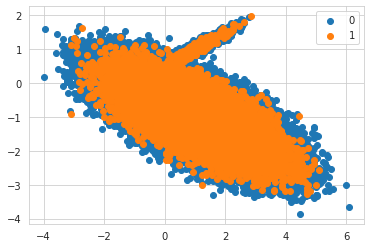

In [293]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))

plt.legend()
plt.show()

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm ,test_size = 1/3, random_state =42 )

<AxesSubplot:>

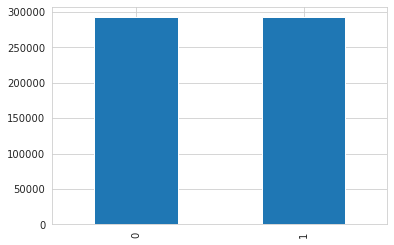

In [295]:
pd.Series(y_sm).value_counts().plot.bar()

# **KNN-AFTER SMOTE**

In [296]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 79.39
Time consumed for training: 0.055 seconds
Time consumed for prediction: 1437.72280 seconds


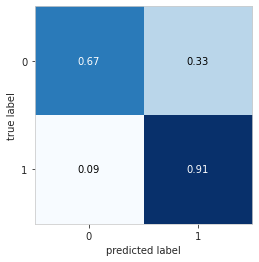

In [297]:
conf_mat = confusion_matrix(y_test, knn.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **GAUSSIAN-NB  - AFTER SMOTE**

In [298]:
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 72.64
Time consumed for training: 0.182 seconds
Time consumed for prediction: 0.05144 seconds


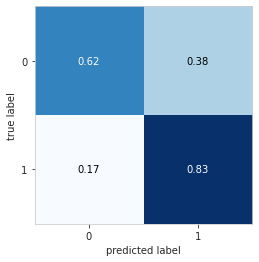

In [299]:
conf_mat = confusion_matrix(y_test, gnb.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **XG-Boost  -AFTER SMOTE**

In [300]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 93.61
Time consumed for training: 32.055
Time consumed for prediction: 0.22915 seconds


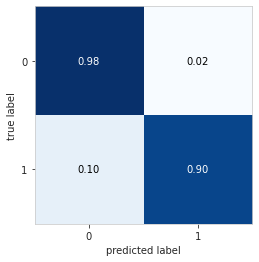

In [301]:
conf_mat = confusion_matrix(y_test, xgb.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **RANDOM FOREST -AFTER SMOTE**

In [302]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 91.39
Time consumed for training: 11.288 seconds
Time consumed for prediction: 0.69734 seconds


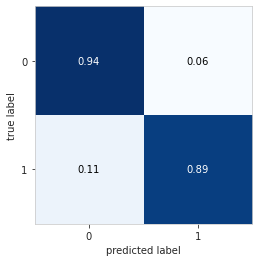

In [303]:
conf_mat = confusion_matrix(y_test, rfc.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

# **COMPARE ALL MODEL RESULT - AFTER SMOTE**

In [304]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc]})
   
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

Score
Model                   
XGBoost        93.614708
Random Forest  91.394115
KNN            79.385785
Naive Bayes    72.638345

In [305]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [306]:
import lime
from lime import lime_tabular

In [307]:
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns,mode='classification')

In [308]:
exp = explainer.explain_instance(X_test.iloc[25],predict_fn=xgb.predict_proba)

In [309]:
exp.show_in_notebook(show_table=True)

In [310]:
exp = explainer.explain_instance(X_test.iloc[50],predict_fn=xgb.predict_proba)

In [311]:
exp.show_in_notebook(show_table=True)

In [312]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [313]:
import shap  # package used to calculate Shap values
from shap import TreeExplainer
from shap.maskers import Independent
from scipy.special import expit, logit

shap.initjs()

In [314]:
X_sampled = X_train

In [315]:
explainer = shap.TreeExplainer(xgb)

In [316]:
choosen_instance = X_test.iloc[[250]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [317]:
shap_values = explainer(X_test)

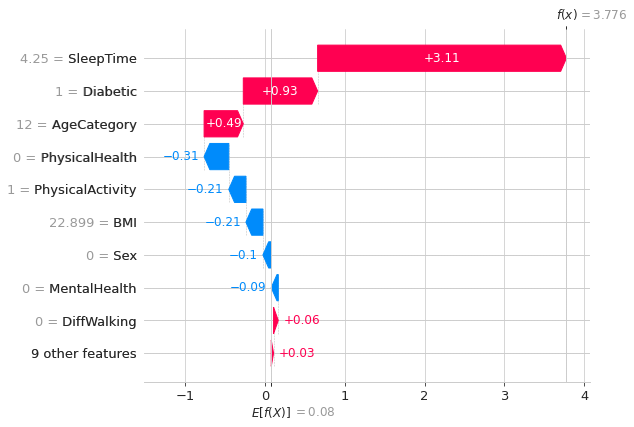

In [318]:
shap.plots.waterfall(shap_values[250])

In [319]:
explainer = shap.TreeExplainer(xgb)
choosen_instance = X_test.iloc[[1000]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

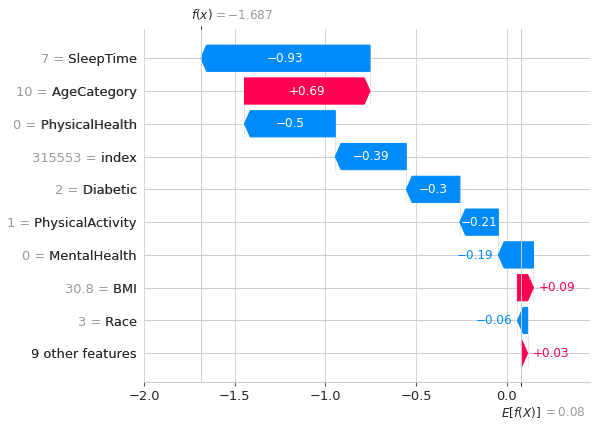

In [320]:
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[1000])

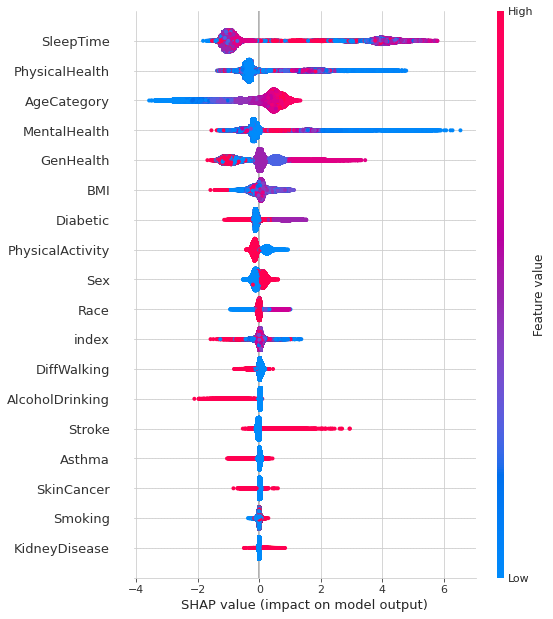

In [321]:
shap.summary_plot(shap_values)

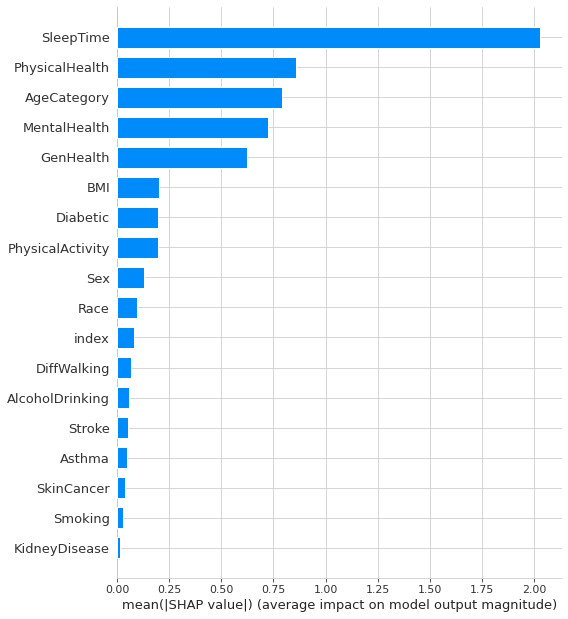

In [322]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [323]:
importances = xgb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

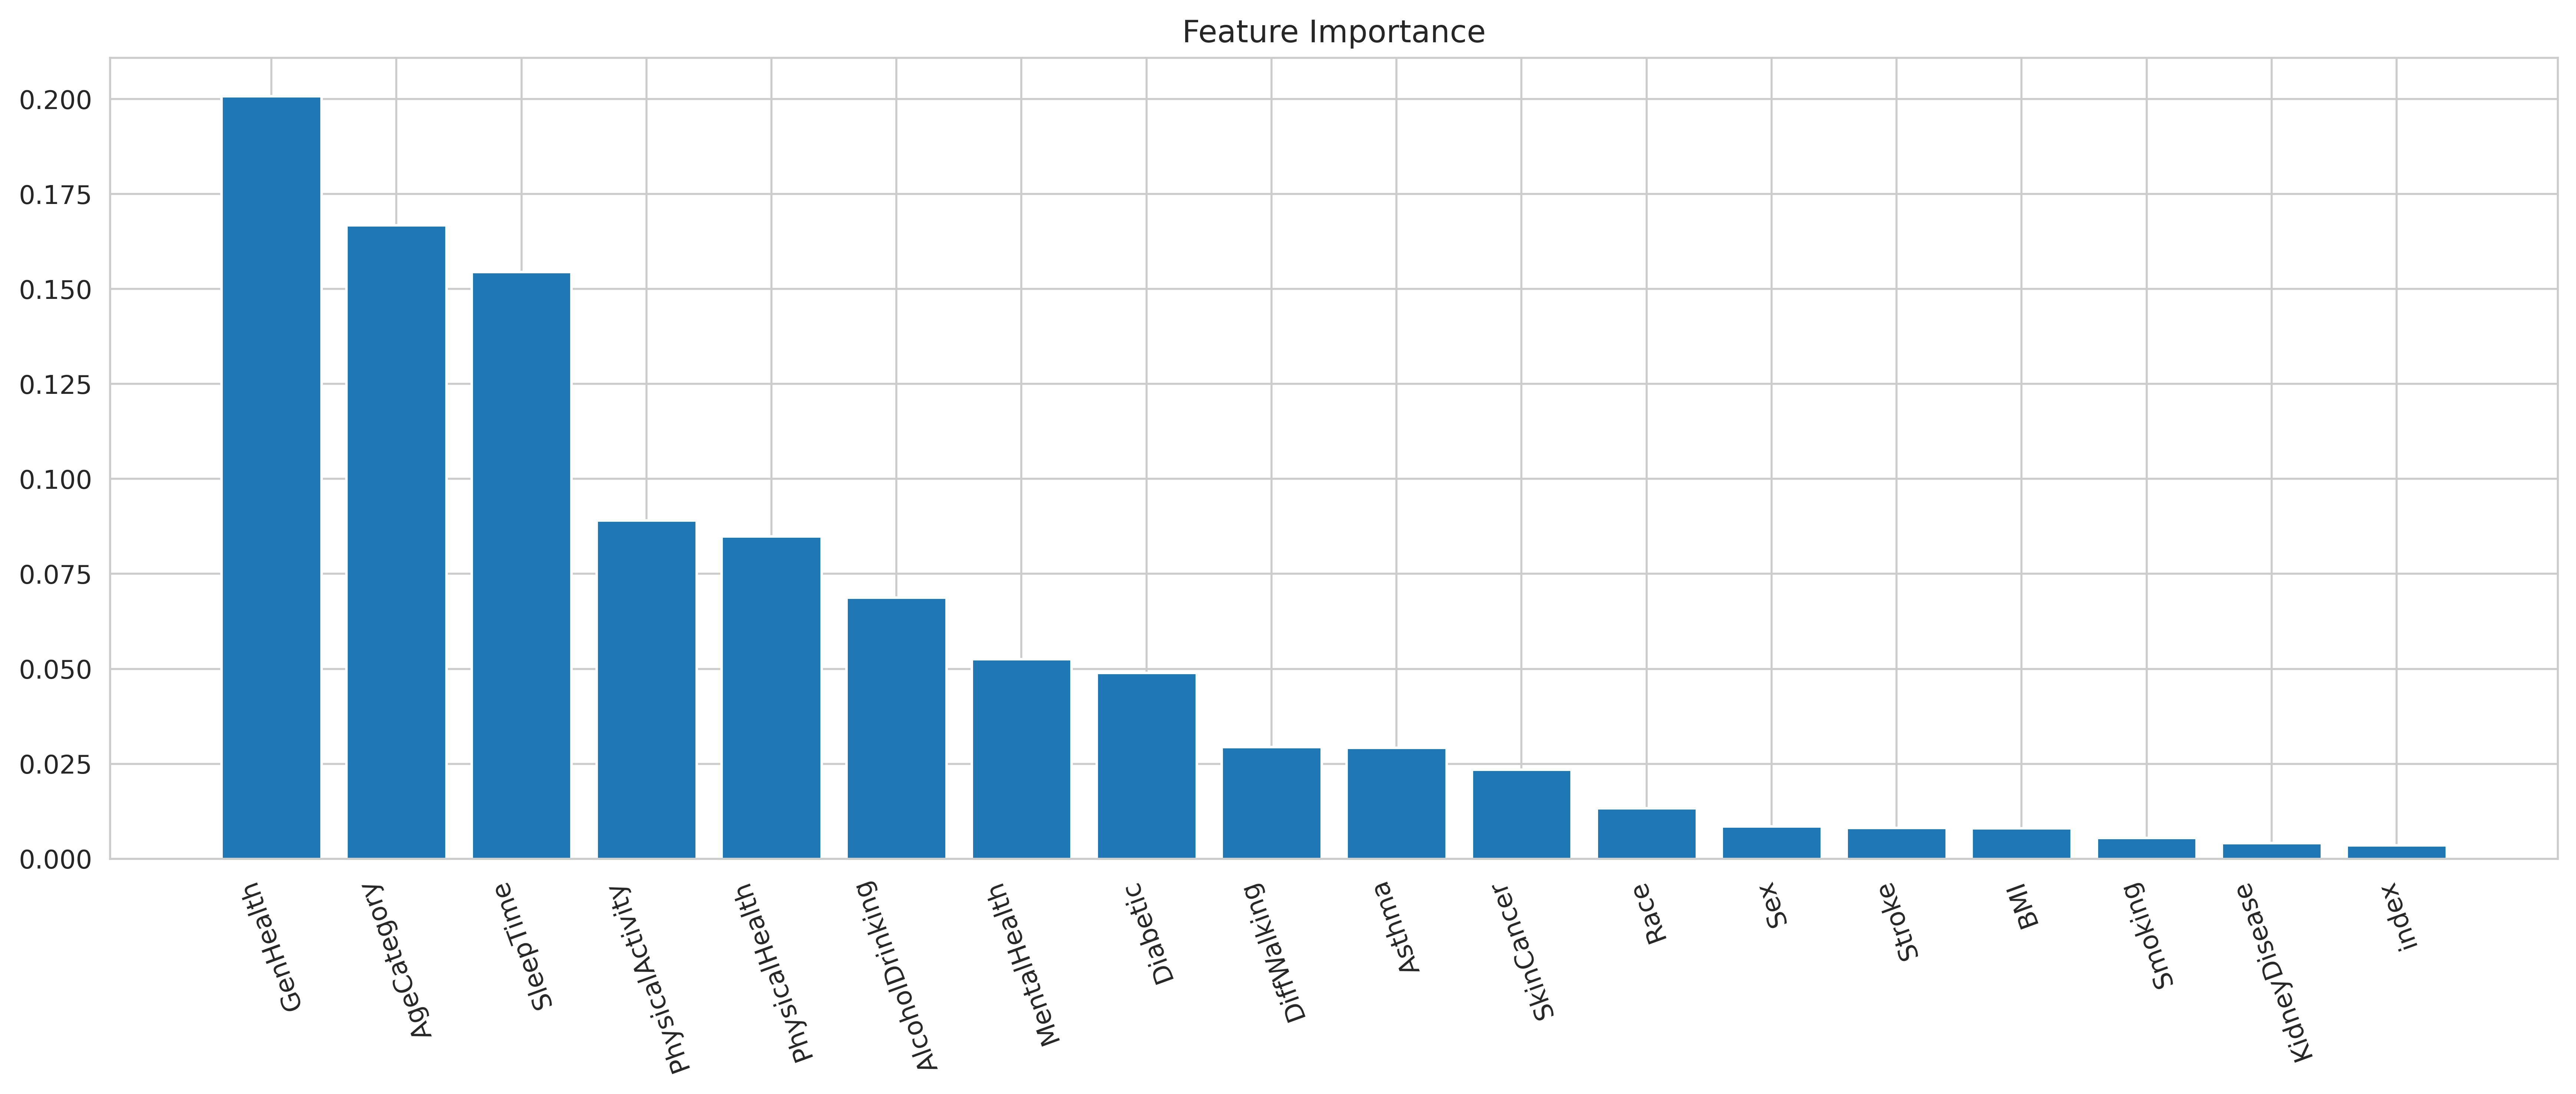

In [324]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 6), dpi=500)
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=110)
plt.tight_layout()
plt.show()


In [325]:
xgb_probs = xgb.predict_proba(X_test)

xgb_probs =xgb_probs[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve
xgb_auc = roc_auc_score(y_test, xgb_probs)

print(f': AUC ROC = {xgb_auc}')

: AUC ROC = 0.9786949757430657


In [326]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

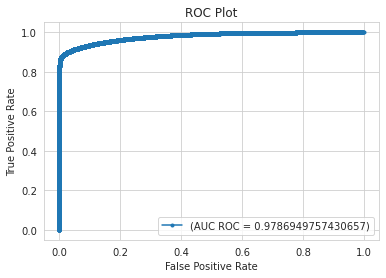

In [327]:
plt.figure(figsize=(6, 4))

plt.plot(xgb_fpr, xgb_tpr, marker='.', label=f'(AUC ROC = {xgb_auc})')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()